In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,8) # set figure size

# Simulation data
We carry out simulation studies to investigate the behaviors of p-values. Consider a two group test, where each group has n=100 samples. Each sample in the first group follows N(0,1) and each sample in the second group follows N(μ, 1). The following code simulate one dataset with μ = 0.5

In [25]:
np.random.seed(100)
def WaldTest(x1, x2):
    n1, n2 = len(x1), len(x2)
    Mu1, Mu2 = np.mean(x1), np.mean(x2)
    std1, std2 = np.std(x1, ddof=1), np.std(x2, ddof=1)
    Theta = Mu2 - Mu1
    SE = np.sqrt(std1**2/n1 + std2**2/n2)
    W = Theta/SE
    Pvalue = chi2.sf(W**2, df=1)
    return Pvalue

mu = 0.5
n = 100
x1 = np.random.normal(0, 1, size=n)
x2 = np.random.normal(mu, 1, size=n)
WaldTest(x1, x2)

0.00022421948789885058

## P-values under the null hypothesis
Now we generate 1000 datasets with μ = 0 and check the distribution of p-values. How does it look like?

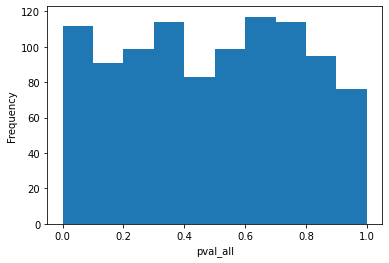

In [26]:
mu = 0
nSIM = 1000
pval_all = np.zeros(nSIM)
for i in range(nSIM):
    x1 = np.random.normal(0, 1, size=n)
    x2 = np.random.normal(mu, 1, size=n)
    pval_all[i] = WaldTest(x1, x2)
    
plt.hist(pval_all, bins=10)
plt.xlabel('pval_all')
plt.ylabel('Frequency');

## Type I error rates
If we use α = 0.05 as a cutoff, how many p-valus are significant?  
How about changing it to α = 0.05/10, 0.05/1000?

In [27]:
print(sum(pval_all < 0.05))
print(sum(pval_all < 0.05/10))
print(sum(pval_all < 0.05/1000))

50
8
0


## Power
Researchers decide to use α = 0.05/1000, the bonferroni corrected alpha of testing 1000 hypothesis, as the cutoff. Now researchers want to check how the power changes by μ. 
First run the simulation with μ = 0.4 and obtain the power. Also check the p-value distribution.


Power: 0.123 



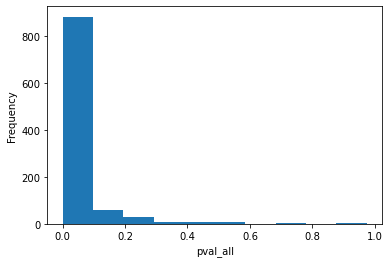

In [28]:
mu = 0.4
nSIM = 1000
pval_all = np.zeros(nSIM)
for i in range(nSIM):
    x1 = np.random.normal(0, 1, size=n)
    x2 = np.random.normal(mu, 1, size=n)
    pval_all[i] = WaldTest(x1, x2)

print("Power:", np.mean(pval_all < 0.05/1000), "\n")
    
plt.hist(pval_all, bins=10)
plt.xlabel('pval_all')
plt.ylabel('Frequency');

### Now carry out simulation studies with μ = 0, 0.1, ..., 1

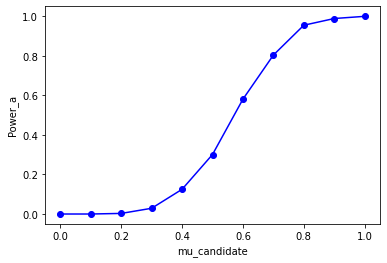

In [29]:
mu_candidate = np.arange(11)/10
nSIM = 1000
cutoff = 0.05/1000
Power_a = np.zeros(11)

for j in range(11):
    pval_all = np.zeros(nSIM)
    mu = mu_candidate[j]
    for i in range(nSIM):
        x1 = np.random.normal(0, 1, size=n)
        x2 = np.random.normal(mu, 1, size=n)
        pval_all[i] = WaldTest(x1, x2)
    Power_a[j] = np.mean(pval_all < cutoff)

plt.plot(mu_candidate, Power_a, 'bo-')
plt.xlabel('mu_candidate')
plt.ylabel('Power_a');

# Permutation test
Permutation test is a popular non-parametric test that does not rely on distributional
assumption or asymptotics. We use the coris data to test whether obesity is differed by
CHD, with B=100000.

In [36]:

df = pd.read_csv('coris.txt', sep=',', skiprows=[0, 1])
sbp0 = df[df['chd'] == 0]['sbp']
sbp1 = df[df['chd'] == 1]['sbp']

Mu0 = np.mean(sbp0)
Mu1 = np.mean(sbp1)
n0 = len(sbp0)
n1 = len(sbp1)

sbp = np.hstack([sbp0, sbp1])
T_org = Mu1 - Mu0



B = 100000
T_permu = np.zeros(B)
for i in range(B):
    idx_1 = np.random.choice(n0+n1, size=n1, replace=False)
    mu1 = np.mean(sbp[idx_1])
    mu0 = np.mean(sbp[-idx_1])
    T_permu[i] = mu1 - mu0

pval = (np.sum(T_permu**2 >= T_org**2) + 1)/(B+1)
pval


3.999960000399996e-05

In [37]:
WaldTest(sbp0, sbp1)

0.00010890948076477764